<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [161]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import seaborn
from sklearn.neighbors import NearestNeighbors

from bs4 import BeautifulSoup
import requests

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [5]:
df = pd.read_csv('data/job_listings.csv')

In [145]:
df.tail(10)


,Unnamed: 0,description,title,text
417,417,b'<div><b><i>About the Role...</i></b><br/>\n<...,Data Analyst / Jr. Data Scientist,About the Role... Logic2020 is looking to s...
418,418,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist- Enterprise Product Analytics,Contract The role is largely operational and ...
419,419,b'<div><ul><li>Bachelor\xe2\x80\x99s or Master...,Data Scientist - Delphi,Bachelor\xe2\x80\x99s or Master\xe2\x80\x99s ...
420,420,"b'<div><div>At Uber, we ignite opportunity by ...","Sr Data Scientist, NLP - Customer Obsession","At Uber, we ignite opportunity by setting the..."
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,About Us: Want to be part of a fantastic and ...
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"Internship At Uber, we ignite opportunity by ..."
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"$200,000 - $350,000 a year A million people a..."
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,SENIOR DATA SCIENTIST JOB DESCRIPTION ABOUT ...
425,425,b'<div></div><div><div><div><div><p>Cerner Int...,Data Scientist,"Cerner Intelligence is a new, innovative orga..."
text,"b""Job Requirements:\nConceptual understanding ...","b'Job Description\n\nAs a Data Scientist 1, yo...",b'As a Data Scientist you will be working on c...,"b'$4,969 - $6,756 a monthContractUnder the gen..."


In [8]:
df.shape

(426, 3)

In [29]:
df['text'] = np.NAN

In [37]:
for i in range(6):
    print(i)
    soup = BeautifulSoup(df['description'][i])
#     for string in soup.stripped_strings:
#         new = str(string)   
#         print(new)
    text = soup.text
    df.loc[i, 'text'] = text

0
1
2
3
4
5


In [143]:
for i in range(426):
    soup = BeautifulSoup(df['description'][i])
    strings = []
    for string in soup.stripped_strings:
        string = str(string)
        string = string.strip('b')
        string = string.strip("'")
        string = string.strip('"')
        string = string.strip("\\n")
        strings.append(string)
        space = ' '
        text = space.join(strings)
    df.loc[i, 'text'] = text

## 2) Use Spacy to tokenize the listings 

In [146]:
nlp = spacy.load("en_core_web_lg")

In [148]:
doc = nlp(df.loc[1, 'text'])

print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

[' ', 'Job', 'Descriptio', '  ', 'Data', 'scientist', '1', 'help', 'build', 'machine', 'learning', 'model', 'data', 'pipeline', 'micro', 'service', 'help', 'client', 'navigate', 'healthcare', 'journey', 'empower', 'improve', 'generation', 'Accolade', 'Applications', 'user', 'experience', 'day', 'life\\xe2\\x80\\xa6', 'work', 'small', 'agile', 'team', 'design', 'develop', 'mobile', 'application', 'iterative', 'fashion', 'work', 'tight', 'knit', 'group', 'development', 'team', 'member', 'Seattle', 'contribute', 'good', 'practice', 'help', 'guide', 'future', 'application', 'operate', 'effectively', 'collaborative', 'member', 'development', 'team', 'operate', 'effectively', 'individual', 'quick', 'turnaround', 'enhancement', 'fix', 'responsible', 'meet', 'expectation', 'deliverable', 'time', 'high', 'quality', 'drive', 'implement', 'new', 'feature', 'mobile', 'application', 'perform', 'thorough', 'manual', 'testing', 'writing', 'test', 'case', 'cover', 'area', 'identify', 'new', 'developme

In [7]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

Exception: 
This task is not complete. 
Replace this line with your code for the task.

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [6]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

SyntaxError: unexpected EOF while parsing (<ipython-input-6-9cfb6145a733>, line 2)

In [150]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(df['text'])

# Get sparse dtm
dtm = vect.transform(df['text'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [151]:
dtm.head(10)

,00,000,02115,03,0305,0356,04,057,062,06366,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [ ]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

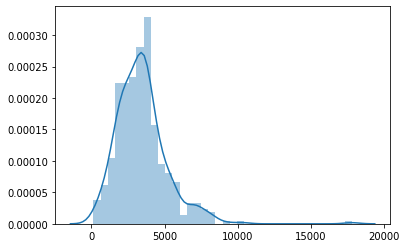

In [155]:
doc_len = [len(doc) for doc in df['text']]

seaborn.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [159]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['text'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head(10)

# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

,00,000,02115,03,0305,0356,04,057,062,06366,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.101924,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [162]:
##### Your Code Here #####


# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."


# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [163]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.28222403, 1.31389908, 1.31999535, 1.32173157]]),
 array([[  0, 276, 274, 338, 366]]))

In [168]:
df.loc[274, 'text']

' General Description:  Assist researchers and software developers on projects bridging the gap between research and analytics by providing data-driven solutions across several policy areas. Work with research and analytics staff in development of streamlined protocols through gathering requirements. Assist team with schema, business rules and configuration testing processes. Support development efforts with standardized protocols to manipulate information captured in a fixed format to usable data, using non-traditional data sources like scraping data from social media, mining data from natural language texts, as well as vectorizing images to create analytical dataset to inform policy decisions. Assist development teams drafting and compiling requirements for complex statistical models, machine learning algorithms and deep learning networks. Assist Data Scientists in developing data products that contain dynamic data visualizations to present findings, data explorers that allow users t

In [171]:
description = ['This is a remote job. Generous compensation and flexible schedule. Job requirements include a degree in mathematics, knowledge of python and SQL.']

token_desc = tfidf.transform(description)

In [174]:
dtm_desc = pd.DataFrame(token_desc.todense(), columns=tfidf.get_feature_names())

In [175]:
nn.kneighbors(dtm_desc)

(array([[1.29001753, 1.30939586, 1.30939586, 1.33178325, 1.33601292]]),
 array([[ 17, 123,  23, 256, 345]]))

In [178]:
df['text'][123]

' Motiion is a technology and data company for the food industry. We believe in transparency, diversity, merit and fostering a culture of accountability, personal impact and career growth.  As a member of the first product engineering team at Motiion you have will have a unique opportunity to turning previously scattered and inconsistently structured data into directly actionable food industry insights to reduce waste, increase freshness and much more.  You have a proven track record of reading data and making solid conclusions. You know both the art and science of analytics - now only do you know how to find answers in the data, you also know which questions should be asked in the first place and what data might could help us further bolster our conclusions. You love engaging with customers, learn about their challenges and then dive into the data to see how to solve them!  We are building a product engineering team with a breadth of combined experiences so that we can collaboratively

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 